# **Importing Dataset:**

In [125]:
import pandas as pd

df = pd.read_csv("/content/Telco_Cusomer_Churn.csv")


# **1 Data Cleaning:**


what is it exactly:

“Is my data usable and trustworthy?”

What you did belongs here:

✔ Loading data

✔ Checking shape and structure

✔ df.info()

✔ Fixing data types (TotalCharges)

✔ Handling missing values

✔ Checking duplicates

✔ Validating numeric ranges

📌 Goal: Make data correct, consistent, and usable.

In [126]:
df.shape

(7043, 21)

In [127]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**👇🏻 Often you’ll see 0 missing in most columns (even TotalCharges) because blanks " " are not counted as NaN.**

In [129]:
df.isna().sum().sort_values(ascending=False)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**👇🏻 If this number > 0, those rows need fixing (convert to NaN then decide what to do)**

In [130]:
(df["TotalCharges"].astype(str).str.strip() == "").sum()


np.int64(11)

**Fix TotalCharges properly**

Convert blanks to NaN

In [131]:
df["TotalCharges"] = df["TotalCharges"].astype(str).str.strip()
df.loc[df["TotalCharges"] == "", "TotalCharges"] = None


Convert to numeric

In [132]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


# Check:

TotalCharges becomes float64

Some NaNs appear (usually around 10–15 rows)

In [133]:
df["TotalCharges"].isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Decide what to do with missing TotalCharges
**Usually, missing TotalCharges happens when:**

**tenure == 0 (new customers)**
**They haven’t paid anything yet**

In [134]:
df[df["TotalCharges"].isna()][["tenure", "MonthlyCharges", "TotalCharges"]].head(10)


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


**set missing TotalCharges = 0**

In [135]:
df.loc[df["TotalCharges"].isna(), "TotalCharges"] = 0


Check duplicates:

What it means

If 0: good

If >0: remove duplicates

In [136]:
df.duplicated().sum()


np.int64(0)

# check customerID uniqueness:

**If nunique == len(df) ✅ each customer unique**

**If not, there are repeated customers**

In [137]:
df["customerID"].nunique(), len(df)


(7043, 7043)

Standardize Yes/No text (optional but clean)

**Some columns contain values like:**

Yes, No

No internet service

No phone service

You don’t need to change everything now, but you should know they exist.
Quick check unique values for key columns

In [138]:
cat_cols = df.select_dtypes(include="object").columns
{col: df[col].unique() for col in cat_cols[:8]}


{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)}

In [139]:
df["InternetService"].value_counts()
df["MultipleLines"].value_counts()
df["OnlineSecurity"].value_counts()
df["PaymentMethod"].value_counts()


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
df.isna().sum().sort_values(ascending=False).head(10)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [142]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**I drop customer id because it generate confusion to the model**

**(ex:Customers with IDs starting with ‘7590’ churn more” ❌)**

In [143]:
df = df.drop(columns=["customerID"])


In [144]:
df.info()
df.isna().sum().sort_values(ascending=False).head(10)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [145]:
df.shape

(7043, 20)

In [146]:
df.isna().sum().sort_values(ascending=False)
# All columns = 0 missing values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Exploratory Data Analysis:**

# **1) TARGET VARIABLE ANALYSIS (Churn)**

----->Before anything else, you must understand:

How many customers churned vs stayed?


1)Value Counts

In [147]:
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


2)Churn Percentage

In [148]:
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


# **2) UNIVARIATE ANALYSIS (NUMERICAL FEATURES):**
# We analyze one variable at a time, ignoring churn for now.

3)Visualize Churn Distribution:

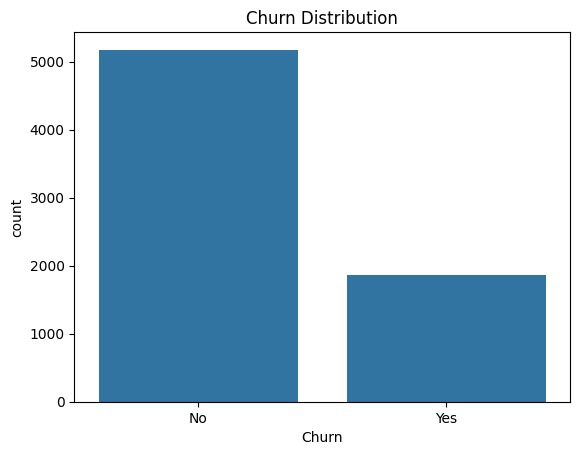

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


**Tenure Distribution**

---->What you should see:

1)Many customers with low tenure....

Gradual decrease as tenure increases...

---->Interpretation:

2)Many customers are new

New customers are often more likely to churn...

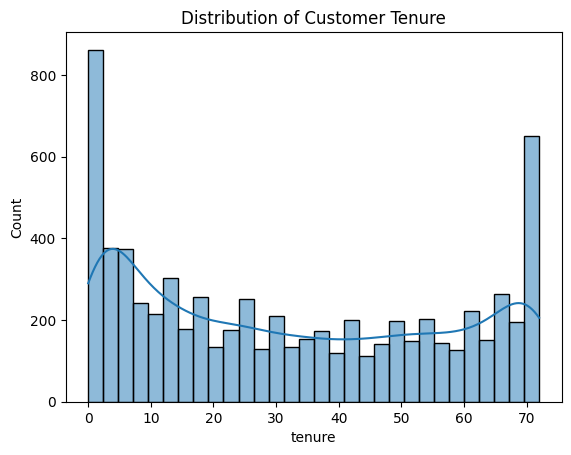

In [150]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.show()


**Monthly Charges Distribution**

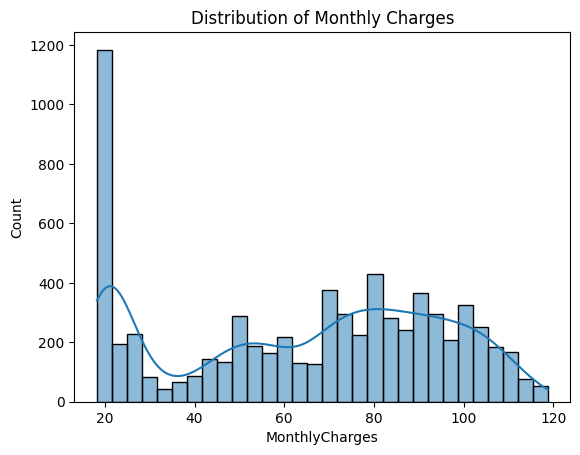

In [151]:
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()


**Total Charges Distribution**

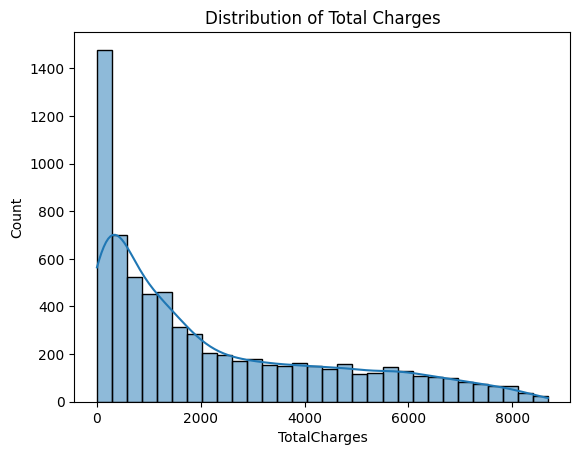

In [152]:
sns.histplot(df["TotalCharges"], bins=30, kde=True)
plt.title("Distribution of Total Charges")
plt.show()


# **3) BIVARIATE ANALYSIS (FEATURE vs CHURN)**

**Churn vs Contract Type (VERY IMPORTANT):**


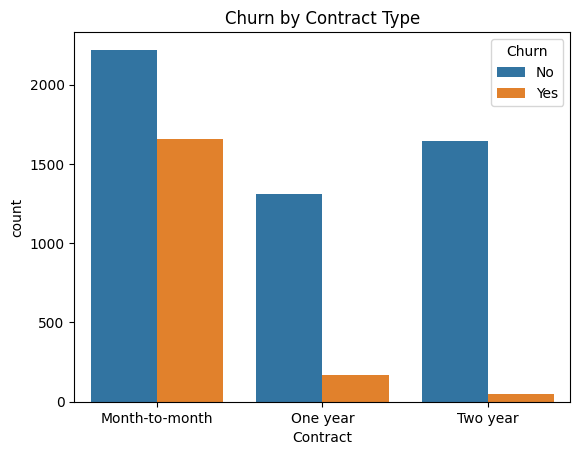

In [153]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


**Churn vs Tenure**


Interpretation:

Churned customers have lower tenure,

Loyal customers stay longer

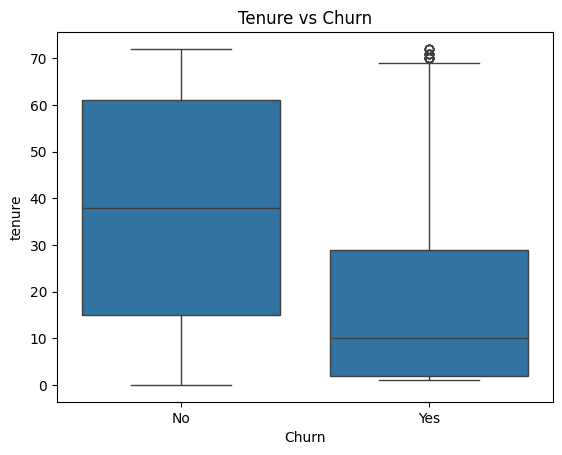

In [154]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


**Churn vs Monthly Charges**

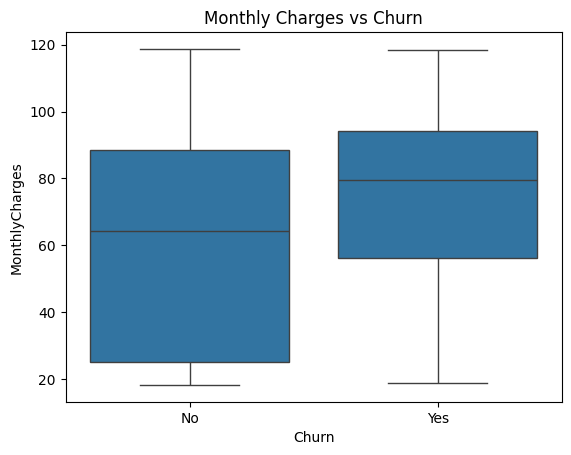

In [155]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


# **4) CATEGORICAL FEATURES vs CHURN**


DSL (Digital Subscriber Line) is a broadband internet technology that delivers high-speed data over existing copper telephone lines.

**Churn vs Internet Service**

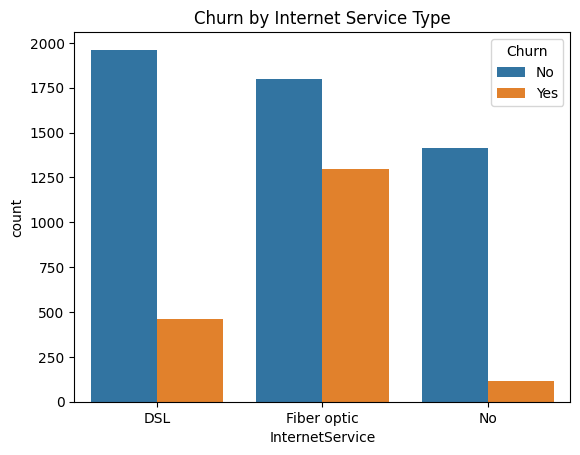

In [156]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.show()


**Churn vs Tech Support**

Interpretation:

Customers without tech support churn more

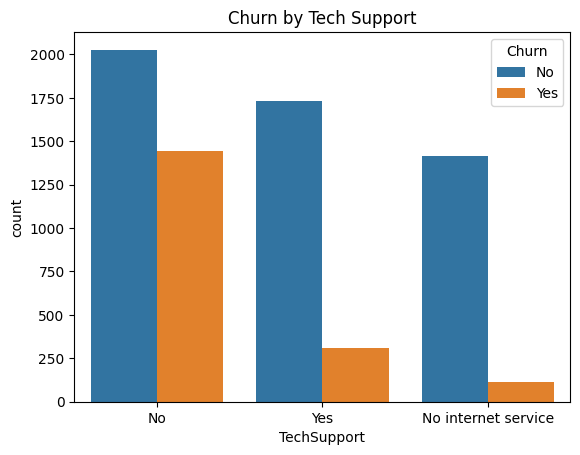

In [157]:
sns.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("Churn by Tech Support")
plt.show()


# **5) MULTIVARIATE ANALYSIS**

Interpretation:

Tenure strongly correlated with TotalCharges

MonthlyCharges less correlated with tenure

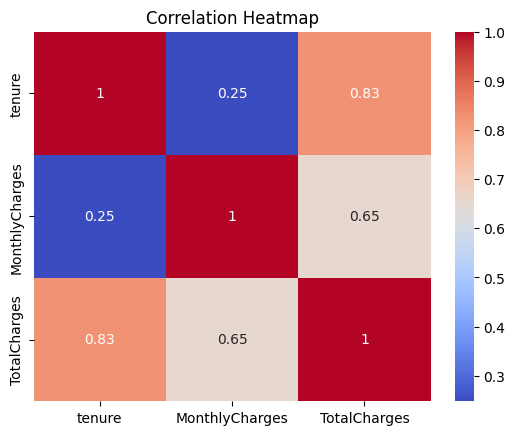

In [158]:
numeric_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# **FEATURE ENGINEERING:**
It is the process of Transforming raw data into meaningful inputs that a model can understand and learn from.

**80% of model performance comes from features, not algorithms.**

Models cannot think — they only learn from numbers.

So we:

Convert categories → numbers

Create useful new features

Remove useless or misleading features.



**Convert Target Variable (Churn)**


In [159]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [160]:
df["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


**Identify Feature Types:**

We will see:

Categorical: gender, Contract, PaymentMethod, etc.

Numerical: SeniorCitizen, tenure, MonthlyCharges, TotalCharges, Churn

📌 We will not encode Churn again.

In [161]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

cat_cols, num_cols


(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object'))

**Encode Categorical Variables**

Why Encoding?

Models cannot interpret text like "Month-to-month".

In [162]:
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)


In [163]:
df_encoded.shape
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


**Create Derived Features**

Average Monthly Spend:

In [164]:
df_encoded["AvgMonthlySpend"] = (
    df_encoded["TotalCharges"] / (df_encoded["tenure"] + 1)
)


Long-Term Customer Flag:

In [165]:
df_encoded["IsLongTermCustomer"] = (df_encoded["tenure"] >= 24).astype(int)


**Feature Engineering Checkpoint:**

In [166]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

# **👆🏻 FEATURE ENGINEERING COMPLETE:**

**At this point:**

**1)Data is machine-readable**

**2)Business logic is embedded**

**3)Dataset is ready for modeling.**

# **👇🏻 Feature Scaling means:**

**Bringing numerical features to a similar scale so that no single feature dominates the model just because of its size.**

**Example:**

TotalCharges → can be up to 8000+

SeniorCitizen → only 0 or 1

Without scaling:

**The model may think TotalCharges is more important just because it has bigger numbers, not because it is more informative.**

In [167]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]


**Train-Test Split (VERY IMPORTANT ORDER)**

**Why now?**

Scaling must be learned ONLY from training data to avoid data leakage.

**Why stratify=y?**

Preserves churn ratio in train & test

Best practice for classification

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Apply Feature Scaling (StandardScaler)

**What is StandardScaler?**

It transforms features to:

Mean = 0

Standard deviation = 1

In [169]:
from sklearn.preprocessing import StandardScaler

num_features = [
    "SeniorCitizen",
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "AvgMonthlySpend"
]


Fit scaler on TRAIN data only

In [170]:
scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


**Verify Scaling Worked:**

In [171]:
X_train[num_features].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
count,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03
mean,7.440898e-17,-1.008935e-17,-2.402527e-16,2.522338e-17,1.387286e-16
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-4.417730e-01,-1.322329e+00,-1.544028e+00,-1.008922e+00,-1.933288e+00
25%,-4.417730e-01,-9.559779e-01,-9.711977e-01,-8.321009e-01,-1.075344e+00
50%,-4.417730e-01,-1.418632e-01,1.848336e-01,-3.968446e-01,6.701906e-02
75%,-4.417730e-01,9.164859e-01,8.319124e-01,6.741944e-01,8.502145e-01
max,2.263606e+00,1.608483e+00,1.785939e+00,2.801869e+00,1.951454e+00


What you should see:

Mean ≈ 0

Std ≈ 1

Values centered around 0

This confirms correct scaling.

# At this point:

✔ Data is clean

✔ Features are engineered

✔ Features are scaled

✔ No data leakage

✔ Model-ready dataset

# MODELING:
**Modeling is the process of:**

Teaching an algorithm to learn patterns from historical data so it can make predictions on new data.

**In our case:**

Input (X): Customer information

Output (y): Whether the customer churns (1) or not (0)

This is a binary classification problem.

# **Why We Start with Logistic Regression:**
**We do NOT start with complex models.**

**Logistic Regression is chosen because:**

Simple and interpretable

Fast to train

Works well as a baseline

Easy to explain to business stakeholders

**📌 Rule:**
If a simple model works well, complex models may not be necessary.

# **Train the Logistic Regression Model:**

In [172]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

👆🏻 What this does:

The model learns relationships between features and churn

Coefficients are estimated for each feature

# Make Predictions:

Meaning:

y_pred → predicted class (0 or 1)

y_pred_proba → probability of churn (very important for business)

In [173]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]


# **Model Evaluation (CRITICAL PART):**

In [174]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8112136266855926

Accuracy alone is misleading with imbalanced data.

# **Confusion Matrix (MOST IMPORTANT):**

**Interpretation:**

True Negatives: Correctly predicted non-churn

True Positives: Correctly predicted churn

False Negatives: Missed churners ❌ (very costly)

False Positives: False alarms

📌 In churn problems, False Negatives are worse.

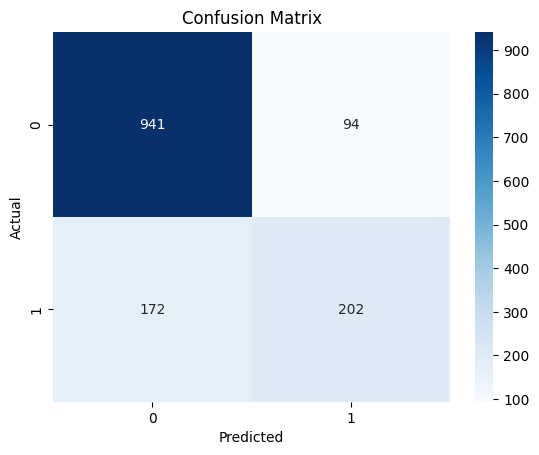

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Classification Report:**

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# **ROC Curve & AUC (Probability-Based Evaluation):**

**Why ROC?**

Measures how well the model separates churn vs non-churn
Independent of threshold.

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred_proba)
auc


np.float64(0.846343227673151)

**Plot ROC:**

Interpretation:

AUC ≈ 0.5 → random

AUC ≈ 0.7–0.8 → good

AUC > 0.8 → very good

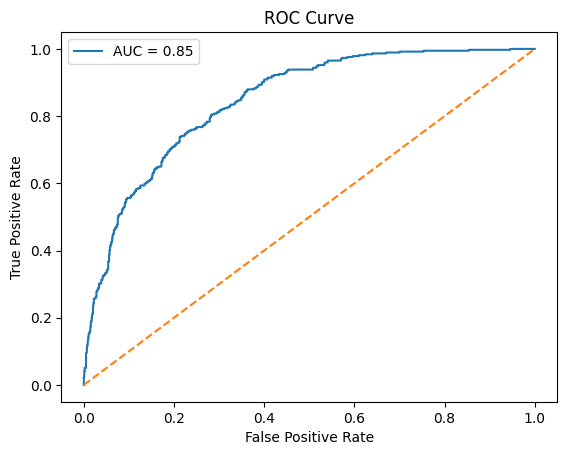

In [178]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# **Model Interpretation (VERY IMPORTANT):**

Positive coefficient → increases churn risk

Negative coefficient → decreases churn risk

📌 This gives business insights, not just predictions.

In [179]:
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,1.470112
23,StreamingMovies_Yes,0.542957
21,StreamingTV_Yes,0.530276
9,MultipleLines_Yes,0.491171
3,TotalCharges,0.473768
26,PaperlessBilling_Yes,0.367188
28,PaymentMethod_Electronic check,0.342466
17,DeviceProtection_Yes,0.136313
2,MonthlyCharges,0.100402
0,SeniorCitizen,0.055082


# **MODELING PHASE COMPLETE**

At this point:

✔ You trained a baseline model

✔ You evaluated it properly

✔ You interpreted results

✔ You avoided common beginner mistakes

# **MODEL IMPROVEMENT:**

We already have a baseline model (Logistic Regression).

Now we ask:

How can we make the model better, more reliable, and more useful for business?

**What “Model Improvement” Really Means**

Model improvement is NOT just increasing accuracy.

It includes:

Choosing better algorithms

Handling class imbalance

Improving recall for churners

Comparing models objectively

Avoiding overfitting

📌 **In churn problems, catching churners is more important than being perfect overall.**

Problem We Must Address First: Class Imbalance

You already saw:

~73% Non-Churn

~27% Churn

If we ignore this:

Model may predict “No churn” most of the time

Looks accurate but fails business goals











# **Improvement Step 1: Use Class Weights (VERY IMPORTANT):**

Why?

Tell the model:

“Misclassifying a churner is more costly.”

# **Apply to Logistic Regression**

In [180]:
log_model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_model_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

**Evaluate Again:**

🔼 Recall for Churn = 1

Acceptable drop in accuracy is OK

📌 This alone is a BIG improvement

In [181]:
y_pred_bal = log_model_balanced.predict(X_test)
y_proba_bal = log_model_balanced.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



# **Improvement Step 2: Try a Tree-Based Model (Decision Tree):**

**Why Decision Trees?**

Capture non-linear patterns

Easy to explain

No need for feature scaling

In [182]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

**Evaluate:**

What you’ll likely see

Higher recall for churn

Slightly lower precision

Risk of overfitting if depth is too high
📌 That’s why we limited max_depth

In [183]:
y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



# **Improvement Step 3: Random Forest (STRONG MODEL):**

**Why Random Forest?**

Combines many trees

Reduces overfitting

Usually performs very well on tabular data

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

**Evaluate:**

Expected result

Best balance of precision & recall

Strong ROC-AUC

Robust performance

In [185]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



# **Compare Models Properly (VERY IMPORTANT):**

**Create a comparison table:**

In [186]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score

models = {
    "Logistic": (y_pred, y_pred_proba),
    "Logistic_Balanced": (y_pred_bal, y_proba_bal),
    "DecisionTree": (y_pred_dt, None),
    "RandomForest": (y_pred_rf, y_proba_rf)
}

comparison = []

for name, (pred, proba) in models.items():
    comparison.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Recall_Churn": recall_score(y_test, pred),
        "Precision_Churn": precision_score(y_test, pred),
        "ROC_AUC": roc_auc_score(y_test, proba) if proba is not None else None
    })

comparison_df = pd.DataFrame(comparison)
comparison_df


,Model,Accuracy,Recall_Churn,Precision_Churn,ROC_AUC
0,Logistic,0.811214,0.540107,0.682432,0.846343
1,Logistic_Balanced,0.740951,0.786096,0.507772,0.846434
2,DecisionTree,0.794180,0.540107,0.631250,NaN
3,RandomForest,0.770759,0.729947,0.551515,0.841334


**How to Choose the “Best” Model (INTERVIEW GOLD):**

❌ Wrong thinking

“Highest accuracy wins”

✅ Correct thinking

“Which model best supports business goals?”

**For churn:**

Recall for churners > Accuracy

Random Forest or Balanced Logistic often wins

# **BUSINESS INSIGHTS & RECOMMENDATIONS:**

Now we convert EDA + modeling results into business language.

**What Are Business Insights?**

Business insights answer:

“So what?” and “What should the company do?”

**They:**

Are actionable

Are non-technical

Link data → decisions → impact

📌 A model without insights is useless to business.

**How We Derive Insights in This Project**

We use:

EDA patterns

Feature importance

Model behavior

Churn probabilities

**Our goal:**

Reduce churn and increase customer lifetime value